<a href="https://colab.research.google.com/github/rodrigo1708/analiseDeDados_pandas/blob/main/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISE DE DADOS COM E PYTHON E PANDAS - DIGITAL INNOVATION ONE

In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
#Upload de arquivo temporário
arquivo = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
df = pd.read_excel("/content/AdventureWorks.xlsx")

In [4]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Linhas x Colunas
print(
    "O arquivo adicionado possui {} linhas e {} colunas"
    .format(df.shape[0], df.shape[1])
    )

O arquivo adicionado possui 904 linhas e 16 colunas


In [6]:
#Tipos de dados
df.dtypes.reset_index()

,index,0
0,Data Venda,datetime64[ns]
1,Data Envio,datetime64[ns]
2,ID Loja,int64
3,ID Produto,int64
4,ID Cliente,int64
5,No. Venda,object
6,Custo Unitário,float64
7,Preço Unitário,float64
8,Quantidade,int64
9,Valor Desconto,float64


In [7]:
#Qual a receita total?
print("A receita total foi de: R$ {}".format(df["Valor Venda"].sum().round(2)))

A receita total foi de: R$ 5984606.14


In [10]:
#Coluna de custo total
df["Custo"] = df["Custo Unitário"] * (df["Quantidade"])

In [11]:
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [12]:
#Visualização de 5 vendas de uma loja específica (Loja ID = 199) 
df.loc[df["ID Loja"]==199].head(5).reset_index()

,index,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,19,2008-05-04,2008-05-15,199,1178,18837,200805044CS605,330.66,998.0,6,0.0,5988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96
4,20,2008-05-06,2008-05-18,199,1178,18838,200805064CS606,330.66,998.0,6,0.0,5988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96


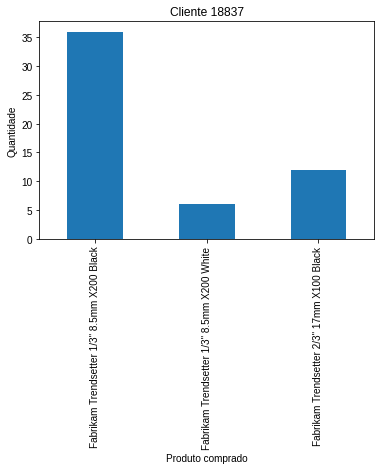

In [13]:
#Agrupar a quantidade de produtos comprados do cliente ID = 18837
cliente = df.loc[df["ID Cliente"] == 18837]
cliente.groupby("Produto")["Quantidade"].sum().plot.bar(title = "Cliente 18837")
plt.xlabel("Produto comprado")
plt.ylabel("Quantidade")
plt.style.use("seaborn");

In [14]:
#Qual o custo total?
print("O Custo total foi de: R$ {}".format(round(df["Custo"].sum(), 2)))

O Custo total foi de: R$ 2486783.05


In [15]:
#Lucro de vendas:
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [16]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [17]:
#Lucro total
print("O lucro total foi de: R$ {}".format(round(df["Lucro"].sum(), 2)))

O lucro total foi de: R$ 3497823.09


In [18]:
#Agrupar a quantidade de linhas por loja
df.groupby("ID Loja").count()

,Data Venda,Data Envio,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
ID Loja,,,,,,,,,,,,,,,,,
199,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307
306,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278,278
307,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319


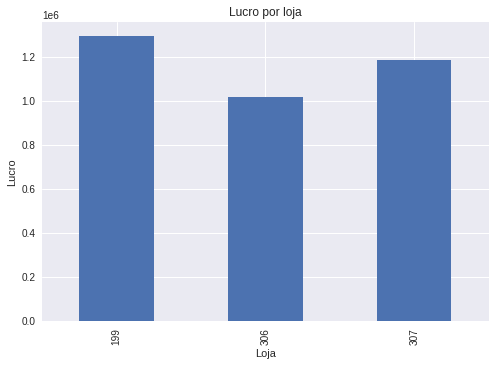

In [19]:
#Gráfico de lucro por loja
df.groupby("ID Loja")["Lucro"].sum().plot.bar(title="Lucro por loja")
plt.xlabel("Loja")
plt.ylabel("Lucro");
plt.style.use("seaborn")

In [20]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
Custo                    float64
Lucro                    float64
dtype: object

In [21]:
#Criando coluna com o tempo para envio de um produto:
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [22]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5


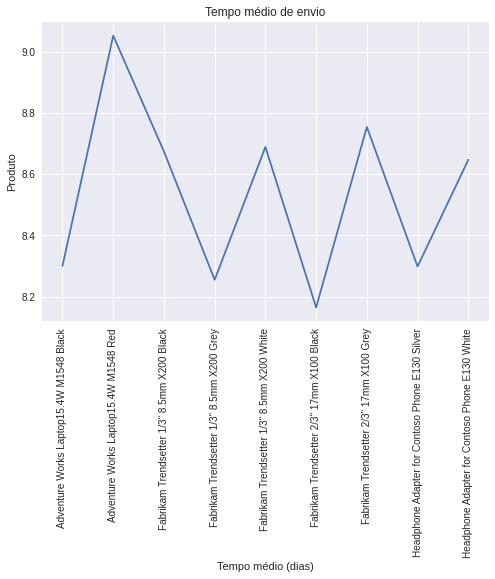

In [23]:
#Média de tempo para envio de produtos
df.groupby("Produto")["Tempo Envio"].mean().plot(title = "Tempo médio de envio")
plt.xlabel("Tempo médio (dias)")
plt.ylabel("Produto")
plt.xticks(rotation="90")
plt.style.use("seaborn");

In [24]:
#Média de tempo de envio por marca
round(df.groupby("Marca")["Tempo Envio"].mean(), 2).reset_index()

,Marca,Tempo Envio
0,Adventure Works,8.66
1,Contoso,8.47
2,Fabrikam,8.51


In [25]:
#Verificando dados ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

# **LUCRO POR ANO E MARCA**



In [26]:
pd.options.display.float_format = '{:,.2f}'.format

In [33]:
df["Ano"] = df["Data Venda"].dt.year

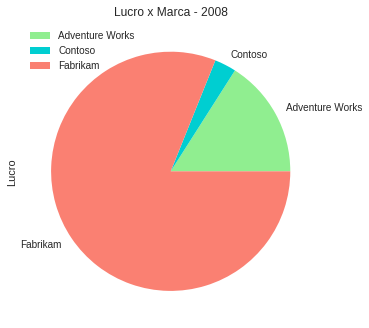

In [34]:
#Agrupando o lucro por marca em 2008
ano08 = df[df["Ano"] == 2008]
ano08.groupby(ano08["Marca"])["Lucro"].sum().round(2).plot.pie(
    title="Lucro x Marca - 2008",
    colors=['lightgreen', 'darkturquoise', 'salmon'],
)
plt.legend()
plt.style.use("grayscale");

In [35]:
#Total de produtos vendidos
print("Total de produtos vendidos:")
total_produtos = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).reset_index()
total_produtos

Total de produtos vendidos:


,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


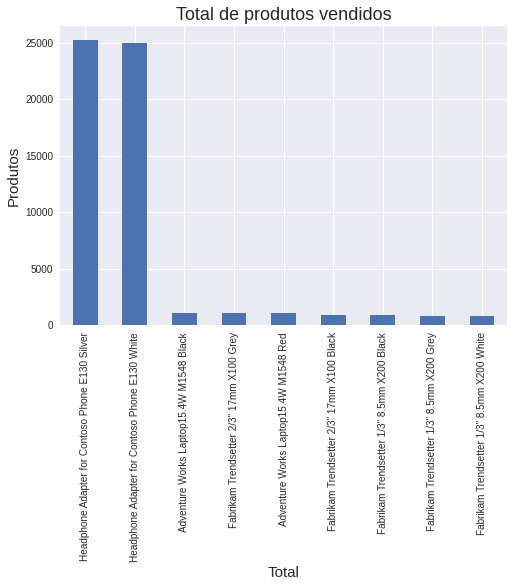

In [37]:
#Gráfico de produtos vendidos
total_produtos2 = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)
total_produtos2.plot.bar()
plt.title("Total de produtos vendidos", fontsize=18)
plt.xlabel("Total", fontsize=15)
plt.ylabel("Produtos", fontsize=15)
plt.xticks(rotation = "vertical")
plt.style.use("seaborn");

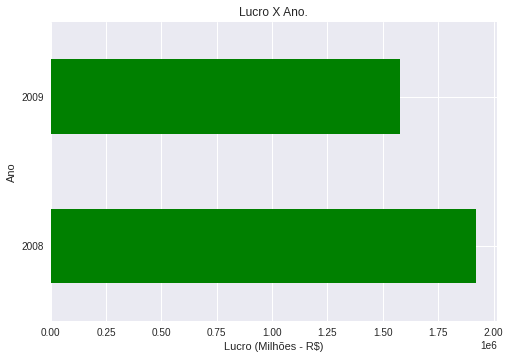

In [40]:
#Lucro por ano
lucro_ano = df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()
lucro_ano.plot.barh(title = "Lucro X Ano.", color="green")
plt.xlabel("Lucro (Milhões - R$)")
plt.ylabel("Ano");

In [42]:
#Vendas do ano de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

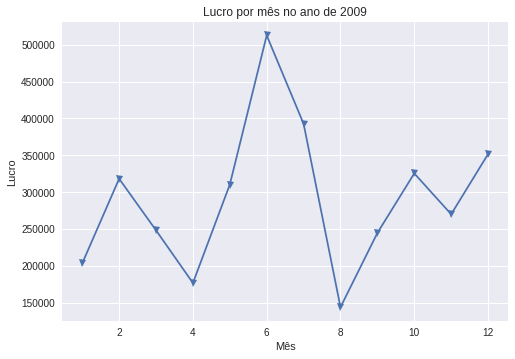

In [43]:
#Gráfico de linha com o lucro por mês em 2009
df.groupby(df["Data Venda"].dt.month)["Lucro"].sum().plot(title = "Lucro por mês no ano de 2009", marker = "v")
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.style.use("seaborn");

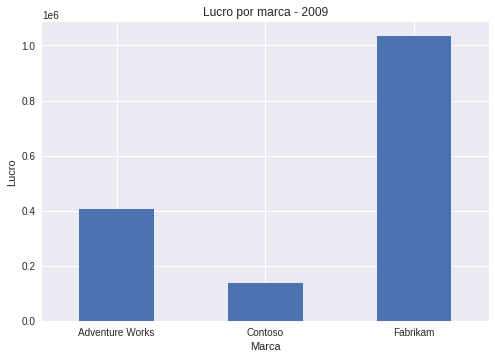

In [44]:
#Lucro por marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title = "Lucro por marca - 2009")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [45]:
#Descrição do tempo de envio:
df["Tempo Envio"].describe()
#25% dos produtos tem um tempo de envio de até 6 dias
#50% dos produtos tem um tempo de envio de até 9 dias
#75% dos produtos tem um tempo de envio de até 11 dias
#O tempo máximo de envio é de 20 dias

count   904.00
mean      8.54
std       3.06
min       4.00
25%       6.00
50%       9.00
75%      11.00
max      20.00
Name: Tempo Envio, dtype: float64

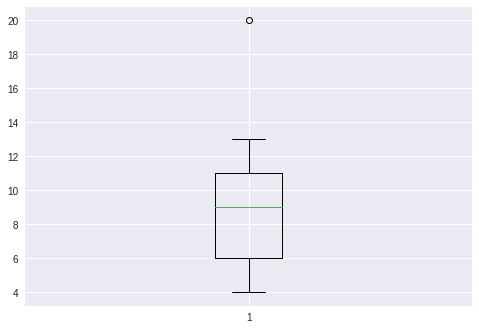

In [46]:
#Gráfico de Boxplot
plt.boxplot(df["Tempo Envio"]);

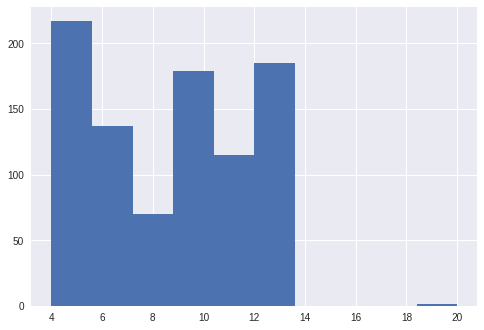

In [47]:
#Histograma
plt.hist(df["Tempo Envio"]);

In [48]:
#Identificando o outlier
df.loc[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio,Ano
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20,2008


In [52]:
#Exportar o arquivo analisado
df.to_csv("df_vendas_novo.csv", index=False)